# Homework Four
Savannah Gramze

In [8]:
import numpy as np
from astropy import constants as const
from astropy import units as u
from matplotlib import pyplot as plt

### Problem One

For a blob moving toward us at an angle to the line of sight, $\theta$, the apparent velocity as a fraction of the speed of light is

$\beta_A = \frac{\beta sin \theta}{1 - \beta cos \theta} $

For $\beta$ = 0.50, $\beta$ = 0.90, and $\beta$ = 0.99, plot $\beta_A$ as a function of $\theta$. This function peaks at some $\theta_{max} = f(\beta)$ and $\beta_{A,max} = f(\beta)$. Find these simplified functional forms and then also overplot this function, $\beta_{A,max} = f(\theta_{max})$, running through the extrema of the first three curves. Then finally reflect: under what situations do we most preferentially observe superluminal motion?

In [11]:
def apparent_velocity(beta, theta):
    top = beta * np.sin(theta)
    bottom = 1 - beta * np.cos(theta)
    return top / bottom

theta = np.linspace(0, np.pi, num=100)

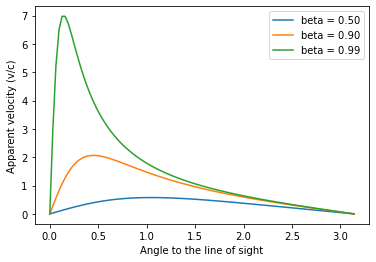

In [25]:
beta = 0.50
Ba_1 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_1, label='beta = 0.50')

beta = 0.90
Ba_2 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_2, label='beta = 0.90')

beta = 0.99
Ba_3 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_3, label='beta = 0.99')

plt.xlabel('Angle to the line of sight')
plt.ylabel('Apparent velocity (v/c)')
plt.legend()

$\beta_A = \frac{\beta sin \theta}{1 - \beta cos \theta} $

$\frac{d \beta_A}{d \theta} = \frac{d}{d \theta} \frac{\beta sin \theta}{1 - \beta cos \theta} $

$\frac{d}{d \theta}(\beta sin \theta) = \beta cos \theta$

$\frac{d}{d \theta}(1 - \beta cos \theta) = \beta sin \theta$

$\frac{d \beta_A}{d \theta} = \frac{\beta cos \theta (1 - \beta cos \theta) - \beta^2 sin^2 \theta}
{(1-\beta cos \theta)^2}$

$\frac{d \beta_A}{d \theta} = \frac{\beta cos \theta - \beta^2}{(1-\beta cos \theta)^2} = 0$

$\beta cos \theta - \beta^2 = 0$

$cos \theta = \beta$

$\theta_{max} = cos^{-1} \beta$

$\beta_{A,max} = \beta_A (\theta_{max}) = \frac{\beta sin(cos^{-1}\beta)}{1 - \beta^2}$

In [36]:
def deriv(beta, theta):
    top = beta * np.cos(theta) - beta**2
    bottom = (1 - beta * np.cos(theta))**2
    return top / bottom
def theta_max(beta):
    return np.arccos(beta)
def Ba_max(beta):
    top = beta * np.sin(np.arccos(beta))
    bottom = 1 - beta**2
    return top / bottom

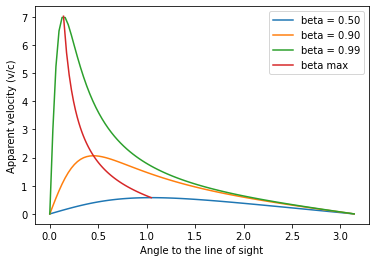

In [43]:
theta = np.linspace(0, np.pi, num=100)
beta = 0.50
Ba_1 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_1, label='beta = 0.50')

beta = 0.90
Ba_2 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_2, label='beta = 0.90')

beta = 0.99
Ba_3 = apparent_velocity(beta, theta)
plt.plot(theta, Ba_3, label='beta = 0.99')

#beta = np.array([0.50, 0.90, 0.99])
beta = np.linspace(0.50, 0.99, num=100)
theta = theta_max(beta)
Ba = Ba_max(beta)
plt.plot(theta, Ba, label='beta max')

plt.xlabel('Angle to the line of sight')
plt.ylabel('Apparent velocity (v/c)')
plt.legend()

Under what situations do we most preferentially observe superluminal motion?

We observe superluminal motion when the "blob" is moving towards us at near the speed of light with an angle very close to the line of sight.

### Problem Two

A Galactic microquasar jet was observed to show a two-sided jet, with ejections traveling in both directions.

(a) From the figure below, estimate the proper motion (in micro-arcsec per day) for both sides of the jet (components SE and NW).

In [72]:
# Δt = 763.7 - 752.7 [days]
# Δx_SE = 45 - 300 [microarcseconds]
# Δx_NW = -0.25 - (-135) [microarcseconds]

t = (763.7 - 752.7) * u.day
x_SE = (45-300) * u.milliarcsecond
x_NW = (-0.25 - (-135)) * u.milliarcsecond

v_SE = x_SE / t
v_NW = x_NW / t

print('Velocity of SE component:', v_SE)
print('Velocity of NW component:', v_NW)

Velocity of SE component: -23.181818181818183 marcsec / d
Velocity of NW component: 12.25 marcsec / d


(b) For a distance of 10 kpc, work out the apparent velocity in cm/s for NW and SE.

In [82]:
# angular size = size / distance
# size = angular size * distance 

dist = 10*u.kpc

def x_to_cm(x, dist):
    x = x.to(u.arcsec)
    x = x * dist.to(u.parsec)
    x = x.to(u.cm, equivalencies=u.dimensionless_angles())
    return x

x_SE = (45-300) * u.milliarcsecond
x_SE = x_to_cm(x_SE, dist)
x_NW = (-0.25 - (-135)) * u.milliarcsecond
x_NW = x_to_cm(x_NW, dist)

t = (763.7 - 752.7) * u.day
t = t.to(u.second)

v_SE = x_SE / t
v_NW = x_NW / t

print('Velocity of SE component:', v_SE)
print('Velocity of NW component:', v_NW)

Velocity of SE component: -40138317580.492424 cm / s
Velocity of NW component: 21210346250.868057 cm / s


(c) Assuming that NW and SE are identical but traveling in opposite directions, solve (including numerical answers) for the actual velocity $\beta_{jet} = v_{jet} / c$ and line–of–sight angle $\theta$ of the jet.

$\beta_A = \frac{\beta sin \theta}{1 - \beta cos \theta} $

$\beta_{A,SE} = \frac{\beta_{jet} sin \theta_{SE}}{1 - \beta_{jet} cos \theta_{SE}} $

$\beta_{A,NW} = \frac{\beta_{jet} sin \theta_{NW}}{1 - \beta_{jet} cos \theta_{NW}} $

$\beta_A = \frac{\beta_J sin \theta}{1 - \beta_J cos \theta} $

$\beta_A - \beta_A \beta_J cos \theta = \beta_J sin \theta$

$\beta_A = \beta_J (sin \theta \beta_A cos \theta)$

$\beta_J = \frac{\beta_A}{sin \theta + \beta_A cos \theta} $

$\frac{\beta_{A, SE}}{sin \theta_{SE} + \beta_{A,SE} cos \theta_{SE}} = 
\frac{\beta_{A, NW}}{sin \theta_{NW} + \beta_{A,NW} cos \theta_{NW}}$

$\theta_{SE} = \theta_{NW} + \pi$

$cos \theta_{Se} = cos (\theta_{NW} + \pi) = -cos \theta_{NW}$

$sin \theta_{SE} = sin (\theta_{NW} + \pi) = -sin \theta_{NW}$

$\frac{\beta_{A, SE}}{-sin \theta_{NW} - \beta_{A,SE} cos \theta_{NW}} = 
\frac{\beta_{A, NW}}{sin \theta_{NW} + \beta_{A,NW} cos \theta_{NW}}$

$(\beta_{A, SE})(sin \theta_{NW} + \beta_{A,NW} cos \theta_{NW}) = 
(\beta_{A, NW})(-sin \theta_{NW} - \beta_{A,SE} cos \theta_{NW})$

$\beta_{A, SE} sin \theta_{NW} + \beta_{A, SE} \beta_{A,NW} cos \theta_{NW} =
- \beta_{A, NW} sin \theta_{NW} - \beta_{A, NW} \beta_{A,SE} cos \theta_{NW}$

$\beta_{A, SE} \beta_{A,NW} cos \theta_{NW} + \beta_{A, NW} \beta_{A,SE} cos \theta_{NW} = - \beta_{A, SE} sin \theta_{NW} - \beta_{A, NW} sin \theta_{NW}$

$2 \beta_{A, SE} \beta_{A,NW} cos \theta_{NW} = -sin \theta_{NW}(\beta_{A, SE} + \beta_{A, NW})$

$tan \theta_{NW} = - \frac{2 \beta_{A, SE} \beta_{A,NW}} {\beta_{A, SE} + \beta_{A, NW}}$

In [115]:
Ba_SE = v_SE / const.c.to(u.cm / u.second)
Ba_NW = v_NW / const.c.to(u.cm / u.second)

def jet_angle(Ba_SE, Ba_NW):
    top = - 2 * Ba_SE * Ba_NW
    bottom = Ba_SE + Ba_NW
    tan = top / bottom
    angle = np.arctan(tan)
    return angle

theta_NW = jet_angle(Ba_SE, Ba_NW).to(u.degree)
theta_SE = theta_NW + 180*u.degree

theta_NW

<Quantity -71.56864823 deg>

In [117]:
theta_SE

<Quantity 108.43135177 deg>

In [120]:
def jet_velocity(Ba, theta):
    top = Ba
    bottom = np.sin(theta) + Ba*np.cos(theta)
    return top / bottom

Bjet = jet_velocity(Ba_NW, theta_NW)
print('Speed of jet:', Bjet, 'c')

Speed of jet: -0.9758448295888712 c


### Problem Three

Long term high resolution monitoring of the star cluster around the Galactic center indicates the presence of a dark, massive object with a total mass of about $M \approx 4 \times 10^6 M_{\odot}$. Radio observations show that this object emits a faint glow and episodic flares. Based on the radio position, the object is called Sgr A* (short for Sagittarius A*) and, since there is no other viable explanation for such a large mass concentration inside such a small volume, we will assume that the object is a black hole.

#### Basic properties for a black hole like Sgr A*: 

For a non-rotating black hole with this mass, calculate the radius of the innermost stable circular orbit (ISCO), the Eddington luminosity, and the Eddington accretion rate (assuming the canonical radiative efficiency).

$R_S = \frac{2 G M}{c^2}$

$R_{ISCO} = 3 \times R_S$

$L_{Edd} = \frac{4 \pi G M m_p c}{\sigma_T}$

$\dot{M} = \frac{L_{Edd}}{\epsilon c^2}$

In [134]:
def r_Schwarz(M):
    return (2 * const.G * M / const.c**2).to(u.m)

def r_ISCO(M): # non-spinning massive object, gravitational field expressed via Schwarschild metric
    return 3 * r_Schwarz(M)

def edd_Lum(M):
    return (4 * np.pi * const.G * M * const.m_p * const.c / const.sigma_T).to(u.erg / u.second)
    
def edd_acc(M, epsilon): # epsilon = fraction of matter turned into energy/luminosity
    return edd_Lum(M) / (epsilon * const.c**2)


In [135]:
M = 4 * 10**6 * u.M_sun

r_ISCO(M).to(u.AU)

<Quantity 0.23689509 AU>

In [180]:
L_edd = edd_Lum(M)
L_edd

<Quantity 5.02826072e+44 erg / s>

In [179]:
edd_acc(M, 0.1).to(u.M_sun / u.year)

<Quantity 0.08879212 solMass / yr>

#### The Salpeter time: 
How long would it take for Sgr A* to double its mass if it were accreting at the Eddington rate? Does your answer depend on the mass of the black hole?

$\tau_{sal} = \frac{\epsilon \sigma_T c}{4 \pi G m_p}$

The Salpeter timescale does not depend on the mass of the black hole.

In [140]:
def sal_time(epsilon):
    top = epsilon * const.sigma_T * const.c
    bottom = 4 * np.pi * const.G * const.m_p
    return top / bottom

In [144]:
sal_time(0.1).to(u.Myr)

<Quantity 45.04904122 Myr>

#### Bondi accretion onto Sgr A*? 
High resolution X-ray observations with Chandra show that the ISM in the immediate vicinity of Sgr A* has a temperature of $T \approx 1.3 keV$ and a density
$n \approx 26 cm^{−3}$. Calculate the Bondi radius, Bondi accretion rate, and inferred luminosity of Sgr A* in this case. By comparing this luminosity to that in the first part and the measured value, $L \approx 10^{36} erg s^{−1}$, what do you conclude about the nature of the accretion flow?

$R_{Bondi} = \frac{2 G M}{c_s^2}$

$\dot{M} = \pi R_{Bondi}^2 \rho c_s$

$c_s = \sqrt{\frac{k_B T}{\mu}}$

In [154]:
T = 1.3 * u.keV
n = 26 * u.cm**(-3)
mu = 2.8 # mass per particle
rho = n * mu * u.Da
L = 10**(36) * u.erg / u.second

In [158]:
def bondi_radius(M, T):
    return (2 * const.G * M / sound_speed(T)**2).to(u.cm)

def bondi_acc(M, T, n):
    return (np.pi * bondi_radius(M, T)**2 * n * sound_speed(T)).to(u.gram / u.second)

def sound_speed(T):
    return np.sqrt(T / const.m_p).to(u.cm / u.second)

In [173]:
R_B = bondi_radius(M, T).to(u.AU)
B_R

<Quantity 56992.83332138 AU>

In [174]:
M_dot = bondi_acc(M, T, rho).to(u.M_sun / u.year)
M_dot

<Quantity 0.00015461 solMass / yr>

In [181]:
def luminosity(M_dot, epsilon):
    return (M_dot * epsilon * const.c**2).to(u.erg / u.second)

L_inf = luminosity(M_dot, 0.1)
L_inf

<Quantity 8.75570369e+41 erg / s>

By comparing this luminosity to that in the first part and the measured value, $L \approx 10^{36} erg s^{−1}$, what do you conclude about the nature of the accretion flow?

Since the measured luminosity of $L \approx 10^{36} erg s^{−1}$ is several orders of magnitude smaller than the inferred luminosity from the Bondi accretion rate and the Eddington accretion rate, we know that the accretion flow onto Sgr A* is much less than its maximum rate or even the rate if it were accreting spherically from the nearby ISM. While Sgr A* is accreting, it is not very active at all.

In [184]:
L / L_inf

<Quantity 1.14211266e-06>

In [185]:
L / L_edd

<Quantity 1.98875925e-09>